In [2]:
import numpy as np
import pandas as pd

# 1. Credit Data

In [3]:
c = pd.read_csv('./credit.tsv.bz2', '\t')

## 1.1

In [4]:
c.shape

(400, 12)

In [5]:
c.count()

ID           400
Income       400
Limit        400
Rating       400
Cards        400
Age          400
Education    400
Gender       400
Student      400
Married      400
Ethnicity    400
Balance      400
dtype: int64

In [6]:
c.dtypes

ID             int64
Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

## 1.2

In [7]:
import statsmodels.formula.api as smf

In [8]:
r = smf.ols(formula = 'Balance ~ Student', data = c).fit()

In [9]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           1.49e-07
Time:                        21:11:06   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.499      0.000     434.300     526.439
Student[T.Yes]   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The predicted balance for someone who is not a student is 480.37. This number increased by 396.46 when the person is a student. This is statistically significant due to the p-value of 0.

## 1.3

In [10]:
r = smf.ols(formula = 'Balance ~ Ethnicity', data=c).fit()

In [11]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Mon, 24 Feb 2020   Prob (F-statistic):              0.957
Time:                        21:11:06   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531.0000     46.319     11.464      0.000     439.939     622.061
Ethnicity[T.Asian]       -18.6863     65.021     -0.287      0.774    -146.515     109.142
Ethnicity[T.Caucasian]   -12.5025     56.681     -0.221      0.826    -123.935      98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
c.Ethnicity.value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

Since there are 3 values of Ethnicity, but only two displayed in the regression model, this means that the missing value (African American), is represented by the intercept. Based on this, the balance of an African American is 531. This balance reduces by 18.69 for an Asian, and 12.5 for a Caucasian. However, only the balance for African Americans is statistically significant, as the other two have high p-values, indicating that this relationship could occur purely due to chance.

## 1.4

In [13]:
r = smf.ols(formula = 'Balance ~ Cards', data = c).fit()

In [14]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.997
Date:                Mon, 24 Feb 2020   Prob (F-statistic):             0.0842
Time:                        21:11:06   Log-Likelihood:                -3017.9
No. Observations:                 400   AIC:                             6040.
Df Residuals:                     398   BIC:                             6048.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    434.2861     54.569      7.958      0.000     327.006     541.566
Cards         28.9869     16.743      1.731      0.084      -3.929      61.903
==============================================================================
Omnibus:                       28.964   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.603
Skew:                           0.566   Prob(JB):                     1.67e-06
Kurtosis:                       2.437   Cond. No.                         8.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this model, the balance of a person with no cards is 434.29, and for every additional card the person has, this balance increases by 28.99. Howver, there is a chance that this relationship occurs purely due to chance, indicated by the low but non-zero p-value.

In [15]:
r = smf.ols(formula = 'Balance ~ C(Cards)', data = c).fit()

In [16]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.144
Date:                Mon, 24 Feb 2020   Prob (F-statistic):              0.332
Time:                        21:11:07   Log-Likelihood:                -3014.7
No. Observations:                 400   AIC:                             6047.
Df Residuals:                     391   BIC:                             6083.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       531.1373     64.286      8.262      0.000     404.748     657.527
C(Cards)[T.2]   -58.1720     77.236     -0.753      0.452    -210.023      93.679
C(Cards)[T.3]   -39.0742     77.663     -0.503      0.615    -191.763     113.615
C(Cards)[T.4]    45.2794     84.024      0.539      0.590    -119.916     210.475
C(Cards)[T.5]    -8.1373    101.645     -0.080      0.936    -207.977     191.702
C(Cards)[T.6]   149.6809    152.622      0.981      0.327    -150.381     449.743
C(Cards)[T.7]   497.6127    238.379      2.087      0.037      28.947     966.278
C(Cards)[T.8]   106.8627    463.574      0.231      0.818    -804.547    1018.272
C(Cards)[T.9]  -149.1373    463.574     -0.322      0.748   -1060.547     762.272
==============================================================================
Omnibus:                       28.038   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.387
Skew:                           0.568   Prob(JB):                     1.86e-06
Kurtosis:                       2.459   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Making Cards a categorical variable separates each value out into its own variable. In this model, we find that having no cards results in a balance of 531.14. If a person has two, three, or nine cards, this balance will reduce, while if they have four, six, seven, or eight cards this balance will increase. If this seems a little random, it is because non of these values (except the intercept -- 0 cards) is statstically significant, indicated by non-zero p-values across the board.

# 2. Implement Categorical to Dummies

## 2.1

In [17]:
def makeDummies(var, name, ref):
    values = var.unique()
    data = pd.DataFrame({name + str(i): [0 for j in range(len(var))] for i in values})
    for i in values:
        indices = c.index[var == i]
        for j in indices:
            data.loc[j, name + str(i)] = 1
    data = data.drop(name + ref, 1)
    return data

##  2.2

In [18]:
test1 = makeDummies(c.Student, 'student', 'No')
test1.head(10)

,studentYes
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [19]:
test2 = makeDummies(c.Ethnicity, 'ethn', 'African American')
test2.head(10)

,ethnCaucasian,ethnAsian
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
5,1,0
6,0,0
7,0,1
8,1,0
9,0,0


In [20]:
test3 = makeDummies(c.Cards, 'card', '1')
test3.head(10)

,card2,card3,card4,card5,card6,card7,card8,card9
0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0
9,0,1,0,0,0,0,0,0


## 2.3

### Cards

In [21]:
test3['Balance'] = c.Balance

In [22]:
r = smf.ols(formula = 'Balance ~ card2 + card3 + card4 + card5 + card6 + card7 + card8 + card9', data = test3).fit()

In [23]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.144
Date:                Mon, 24 Feb 2020   Prob (F-statistic):              0.332
Time:                        21:11:09   Log-Likelihood:                -3014.7
No. Observations:                 400   AIC:                             6047.
Df Residuals:                     391   BIC:                             6083.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    531.1373     64.286      8.262      0.000     404.748     657.527
card2        -58.1720     77.236     -0.753      0.452    -210.023      93.679
card3        -39.0742     77.663     -0.503      0.615    -191.763     113.615
card4         45.2794     84.024      0.539      0.590    -119.916     210.475
card5         -8.1373    101.645     -0.080      0.936    -207.977     191.702
card6        149.6809    152.622      0.981      0.327    -150.381     449.743
card7        497.6127    238.379      2.087      0.037      28.947     966.278
card8        106.8627    463.574      0.231      0.818    -804.547    1018.272
card9       -149.1373    463.574     -0.322      0.748   -1060.547     762.272
==============================================================================
Omnibus:                       28.038   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.387
Skew:                           0.568   Prob(JB):                     1.86e-06
Kurtosis:                       2.459   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results for cards are the same as the above

### Ethnicity

In [24]:
test2['Balance'] = c.Balance

In [25]:
r = smf.ols(formula = 'Balance ~ ethnAsian + ethnCaucasian', data = test2).fit()

In [26]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Mon, 24 Feb 2020   Prob (F-statistic):              0.957
Time:                        21:11:10   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       531.0000     46.319     11.464      0.000     439.939     622.061
ethnAsian       -18.6863     65.021     -0.287      0.774    -146.515     109.142
ethnCaucasian   -12.5025     56.681     -0.221      0.826    -123.935      98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results for ethnicity are the same as above

### Student

In [27]:
test1['Balance'] = c.Balance

In [28]:
r = smf.ols(formula = 'Balance ~ studentYes', data = test1).fit()

In [29]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           1.49e-07
Time:                        21:11:11   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    480.3694     23.434     20.499      0.000     434.300     526.439
studentYes   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results for student are the same as above.

# 3. Model AirBnB Price

## 3.1

In [30]:
l = pd.read_csv('./listings.csv', usecols = ['price', 'bedrooms', 'room_type', 'accommodates', 'bathrooms'])

In [31]:
l.shape

(38814, 5)

In [32]:
l.count()

room_type       38814
accommodates    38814
bathrooms       38807
bedrooms        38700
price           38814
dtype: int64

There appear to be nulls in this dataset, since there are 38814 observations, but some variables have fewer values.

## 3.2

### 3.2a

In [33]:
l['price'] = l.price.str.replace('[\$,]', '', regex=True).astype(float)

### 3.2b

In [34]:
l = l.dropna()

In [35]:
l.shape

(38695, 5)

In [36]:
l.count()

room_type       38695
accommodates    38695
bathrooms       38695
bedrooms        38695
price           38695
dtype: int64

## 3.3

In [37]:
import matplotlib.pyplot as plt

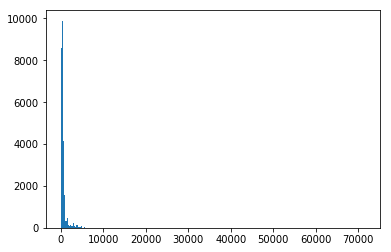

In [38]:
_ = plt.hist(l.price, bins=500)

This distribution does not look normal as it is skewed to the right, and therefore we should do a log transformation.

## 3.4

In [39]:
l['bedrooms'] = l['bedrooms'].astype(int)
four_plus = l.index[l.bedrooms >= 4]
l['bedrooms'] = l['bedrooms'].apply(str)
for i in four_plus:
    l.loc[i, 'bedrooms'] = '4+'

In [40]:
# edit function to use listings dataset
def makeDummies(var, name, ref):
    values = var.unique()
    data = pd.DataFrame({name + str(i): [0 for j in range(len(var))] for i in values})
    for i in values:
        indices = l.index[var == i]
        for j in indices:
            data.loc[j, name + str(i)] = 1
    data = data.drop(name + ref, 1)
    return data

In [41]:
bds = makeDummies(l.bedrooms, 'bd', '4+')

In [42]:
bds.sample(5)

,bd3,bd1,bd2,bd0
17151,0.0,1.0,0.0,0.0
23495,0.0,1.0,0.0,0.0
12489,0.0,0.0,1.0,0.0
31887,0.0,0.0,1.0,0.0
12374,0.0,1.0,0.0,0.0


## 3.5

In [43]:
bds['price'] = l.price

In [44]:
r = smf.ols(formula = 'price ~ bd1 + bd2 + bd3 + bd0', data = bds).fit()

In [45]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1090.
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:12:16   Log-Likelihood:            -3.4049e+05
No. Observations:               38585   AIC:                         6.810e+05
Df Residuals:                   38580   BIC:                         6.810e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2616.8972     32.580     80.322      0.000    2553.039    2680.755
bd1        -2179.4239     34.162    -63.797      0.000   -2246.382   -2112.466
bd2        -1871.6146     37.641    -49.723      0.000   -1945.391   -1797.838
bd3        -1420.2113     46.039    -30.848      0.000   -1510.449   -1329.973
bd0        -2169.2420    112.800    -19.231      0.000   -2390.333   -1948.151
==============================================================================
Omnibus:                    95546.232   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1528048665.811
Skew:                          26.832   Prob(JB):                         0.00
Kurtosis:                     976.433   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.6

These results indicate that the price of a house with more than 4 bedrooms is 2616.89. If there is one bedroom, this price decreases by 2179.42, if there are two bedrooms the price decreases by 1871.61, if there are three bedrooms the price decreases by 1420.21, and if there are no bedrooms, the price decreases by 2169.24. These are all statistically significant due to the zero p-values, but it is a poor model due to the low R-squared value. This means that only 10% of the variation in the data can be explained by the model.

## 3.7

In [46]:
bds['lprice'] = bds.price.apply(lambda x: np.log(x + 1))

In [47]:
bds.sample(5)

,bd3,bd1,bd2,bd0,price,lprice
3180,0.0,1.0,0.0,0.0,267.0,5.590987
23856,0.0,1.0,0.0,0.0,296.0,5.693732
7035,0.0,1.0,0.0,0.0,303.0,5.717028
11233,0.0,0.0,0.0,0.0,901.0,6.804615
9088,0.0,1.0,0.0,0.0,359.0,5.886104


In [48]:
r = smf.ols(formula = 'lprice ~ bd0 + bd1 + bd2 + bd3', data = bds).fit()

In [49]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     4493.
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:12:17   Log-Likelihood:                -40210.
No. Observations:               38585   AIC:                         8.043e+04
Df Residuals:                   38580   BIC:                         8.047e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4058      0.014    544.976      0.000       7.379       7.432
bd0           -1.6117      0.047    -34.256      0.000      -1.704      -1.520
bd1           -1.6239      0.014   -113.969      0.000      -1.652      -1.596
bd2           -1.0618      0.016    -67.630      0.000      -1.093      -1.031
bd3           -0.6520      0.019    -33.954      0.000      -0.690      -0.614
==============================================================================
Omnibus:                     4134.472   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28644.206
Skew:                           0.275   Prob(JB):                         0.00
Kurtosis:                       7.185   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
b0 = np.exp(7.4058)
b0

1645.5007102252778

In [51]:
b1 = np.exp(-1.6117)
b1

0.19954809380521402

In [52]:
b2 = np.exp(-1.6239)
b2

0.19712839722217576

In [53]:
b3 = np.exp(-1.0618)
b3

0.34583275079327247

In [54]:
b4 = np.exp(-0.652)
b4

0.5210027286033344

According to this model, the price of a AirBnb with 4 rooms is 1645.50. An AirBnb with no rooms costs 19.95% of this, an AirBnb with one room costs 19.7% of this, an AirBnb with two rooms costs 34.6% of this, and an AirBnb with three rooms costs 52.1% of this. These numbers are all statistically significant due to their zero p-values, and this model is a better fit than the non-log normal model since the R-squared value is higher, although it is still fairly low.

## 3.8

In [55]:
l.accommodates.sample(5)

13397    2
19914    2
9578     3
24574    2
37984    2
Name: accommodates, dtype: int64

In [56]:
four_and_more = l.index[l.accommodates >= 4]
l['accommodates'] = l['accommodates'].apply(str)
for i in four_and_more:
    l.loc[i, 'accommodates'] = '4-and-more'

In [57]:
l.bathrooms.sample(5)

9582     2.0
13980    1.0
16790    1.0
11660    1.0
10884    1.0
Name: bathrooms, dtype: float64

In [58]:
l['bathrooms'] = l.bathrooms.round(decimals=0)
l['bathrooms'] = l['bathrooms'].astype(int)

In [59]:
l.bathrooms.value_counts()

1      27370
2       8258
3        852
0        672
4        639
5        235
6        235
8        206
7        102
10        37
9         28
12        18
11        10
14         6
16         6
15         4
18         4
20         4
13         3
22         2
25         2
102        1
33         1
Name: bathrooms, dtype: int64

In [60]:
three_and_more = l.index[l.bathrooms >= 3]
l['bathrooms'] = l['bathrooms'].apply(str)
for i in three_and_more:
    l.loc[i, 'bathrooms'] = '3-and-more'

In [61]:
acc = makeDummies(l.accommodates, 'acc', '4-and-more')
acc.sample(5)

,acc2,acc3,acc1
29589,0.0,0.0,0.0
37344,0.0,0.0,0.0
4132,1.0,0.0,0.0
14138,0.0,0.0,1.0
13153,0.0,0.0,0.0


In [62]:
brs = makeDummies(l.bathrooms, 'bath', '3-and-more')
brs.sample(5)

,bath2,bath1,bath0
22362,1.0,0.0,0.0
22958,0.0,1.0,0.0
24259,0.0,1.0,0.0
14107,0.0,1.0,0.0
4284,0.0,1.0,0.0


## 3.9

In [63]:
for i in bds.columns:
    l[i] = bds[i]

In [64]:
for i in acc.columns:
    l[i] = acc[i]

In [65]:
for i in brs.columns:
    l[i] = brs[i]

In [66]:
l.sample(5)

,room_type,accommodates,bathrooms,bedrooms,price,bd3,bd1,bd2,bd0,lprice,acc2,acc3,acc1,bath2,bath1,bath0
17750,Entire home/apt,3,1,1,282.0,0.0,1.0,0.0,0.0,5.645447,0.0,1.0,0.0,0.0,1.0,0.0
38301,Entire home/apt,4-and-more,1,2,451.0,0.0,0.0,1.0,0.0,6.113682,0.0,0.0,0.0,0.0,1.0,0.0
4618,Private room,2,1,1,1675.0,0.0,1.0,0.0,0.0,7.424165,1.0,0.0,0.0,0.0,1.0,0.0
30069,Private room,3,1,1,465.0,0.0,1.0,0.0,0.0,6.144186,0.0,1.0,0.0,0.0,1.0,0.0
10563,Entire home/apt,4-and-more,1,2,528.0,0.0,0.0,1.0,0.0,6.270988,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
r = smf.ols(formula = 'lprice ~ bd0 + bd1 + bd2 + bd3 + acc1 + acc2 + acc3 + bath2 + bath1 + bath0 + room_type', data = l).fit()

In [68]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     2684.
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:18:17   Log-Likelihood:                -35876.
No. Observations:               38585   AIC:                         7.178e+04
Df Residuals:                   38572   BIC:                         7.189e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     7.6843      0.014    567.171      0.000       7.658       7.711
room_type[T.Private room]    -0.3187      0.007    -42.765      0.000      -0.333      -0.304
room_type[T.Shared room]     -0.9371      0.017    -55.242      0.000      -0.970      -0.904
bd0                          -0.8548      0.045    -19.193      0.000      -0.942      -0.767
bd1                          -0.7757      0.020    -39.635      0.000      -0.814      -0.737
bd2                          -0.6395      0.019    -34.066      0.000      -0.676      -0.603
bd3                          -0.3426      0.020    -17.457      0.000      -0.381      -0.304
acc1                         -0.6033      0.016    -38.718      0.000      -0.634      -0.573
acc2                         -0.2752      0.010    -26.601      0.000      -0.296      -0.255
acc3                         -0.2128      0.014    -15.671      0.000      -0.239      -0.186
bath2                        -0.6225      0.019    -33.466      0.000      -0.659      -0.586
bath1                        -0.6610      0.019    -35.334      0.000      -0.698      -0.624
bath0                        -0.8354      0.030    -27.767      0.000      -0.894      -0.776
==============================================================================
Omnibus:                     8654.854   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79968.890
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       9.860   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
l.room_type.value_counts()

Entire home/apt    23840
Private room       13053
Shared room         1802
Name: room_type, dtype: int64

In [74]:
coefficients = r.params
coefficients

Intercept                    7.684314
room_type[T.Private room]   -0.318679
room_type[T.Shared room]    -0.937094
bd0                         -0.854758
bd1                         -0.775660
bd2                         -0.639528
bd3                         -0.342583
acc1                        -0.603308
acc2                        -0.275246
acc3                        -0.212810
bath2                       -0.622521
bath1                       -0.661014
bath0                       -0.835449
dtype: float64

In [76]:
coefficients = [np.exp(i) for i in coefficients]
coefficients

[2173.9783085242366,
 0.7271086846214859,
 0.3917645876315846,
 0.4253861385060676,
 0.46039994447917704,
 0.5275414888036061,
 0.7099343380776612,
 0.5469994314606638,
 0.7593855268616528,
 0.8083098704400825,
 0.5365899259019913,
 0.5163274701288614,
 0.4336797789610901]

This model is stronger than any of the previous ones because it has a higher R-squared value. However, it is not a strong model because the value is still under 0.5. All the coefficients are statistically significant as well due to their zero p-values. However, it is a bit of a confusing model since the base value represents the price (2173.95) of a four or more bedroom AirBnb which accomodates four or more people, has three or more bathrooms, and is an entire home/apt. If any of these attributes changes, the price of the AirBnb listing reduces.